# Ionosphere Data Analysis and Prediction

### Contents

1. Data Gathering and Wrangling
2. Exploring the Data
3. Pre-processing
4. Modeling
5. Summary and Documentation

In this analysis the dataset will be obtained from the UCI databases website.  


The data is sourced from the Space Physics Group of the Applied Physics Laboratory of Johns Hopkins University

### 1. Data Gathering and Wrangling

In [2]:
# Importing initial resources
import pandas as pd
import numpy as np

In [3]:
# Loading in the Ionosphere dataset
ion = pd.read_csv('data/ionosphere.csv', names=range(35))

# Taking a look at the format and top rows
ion.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Gathering a basic understanding of the data structure

In [4]:
ion.shape

(351, 35)

In [5]:
ion.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

All datatypes are good to go except for the last column. Which is also the label that will be predicted on. This will need to be converted to an interger pair that represents good or bad.

### 2. Exploring the Data

In [7]:
# Here there is an attempt to understand what the purpose of the first two columns is.

print(ion[0].value_counts())
print(ion[1].value_counts())

1    313
0     38
Name: 0, dtype: int64
0    351
Name: 1, dtype: int64


The first column has some variation in it. While the second column has no change in the data. This makes it useless when it comes to modeling. It will most likely be dropped at a latter step.

As for the first column... I'm not sure what to do with that. It would be nice to have a better understanding of its purpose.

In [8]:
# Checking for any differences between these two values in the first column
print(ion[ion[0] == 1])
print(ion[ion[0] == 0])

     0   1        2        3        4        5        6        7        8   \
0     1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1     1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2     1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3     1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4     1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
..   ..  ..      ...      ...      ...      ...      ...      ...      ...   
346   1   0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567  0.90441   
347   1   0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920  0.94590   
348   1   0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431  0.95584   
349   1   0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646  0.85746   
350   1   0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260  0.88928   

          9   ...       25       26       27       28       29 

<AxesSubplot:>

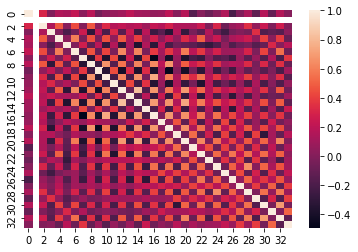

In [9]:
import seaborn as sns

# Perhaps a heatmap describing the correlation between columns will give some insight
sns.heatmap(ion.corr())

The structure here is very intriguing. I wonder if it has some underlying link to how the arrays detect electromagnetic waves and free electrons.

(array([ 37.,  11.,  10.,   9.,  15.,  54.,  16.,  23.,  52., 124.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

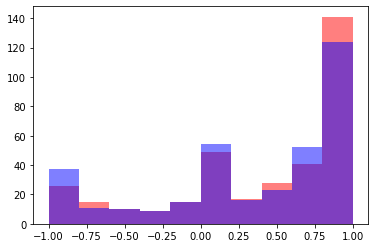

In [10]:
# Column 12 and 14 appear to be highly correlated. Let's plot this
import matplotlib.pyplot as plt

plt.hist(ion[12], alpha=0.5, color='r')
plt.hist(ion[14], alpha=0.5, color='b')

Almost identical

From here let's fix our column that will be predicted on

In [11]:
ion[34].value_counts()

g    225
b    126
Name: 34, dtype: int64

In [12]:
mapping = {'g': 1, 'b': 0}
ion.replace({34: mapping}, inplace=True)
ion[34].value_counts()

1    225
0    126
Name: 34, dtype: int64

Perfect. Now the label column is ready for prediction

Plotting the histograms for all columns

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>],
       [<AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubp

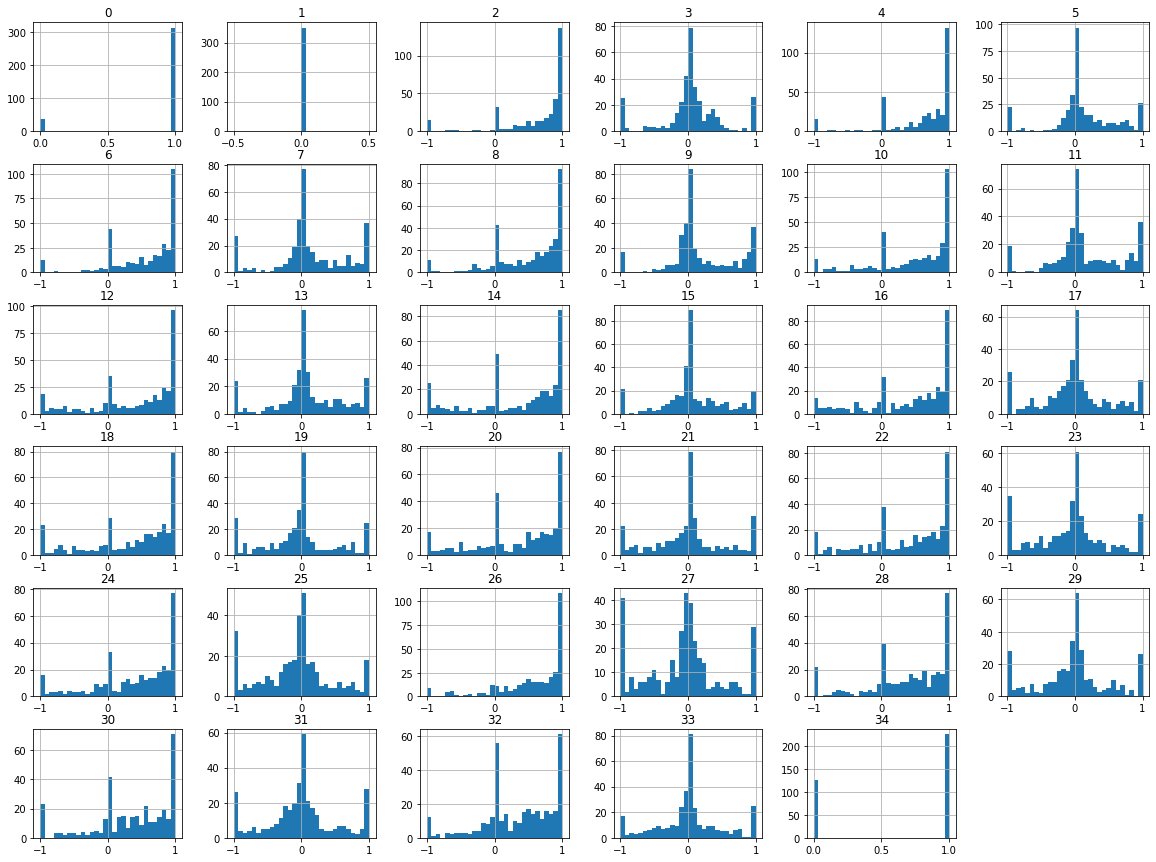

In [17]:
ion.hist(bins=30, figsize=(20, 15))

In [21]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(ion[12], ion[14])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.826


In [24]:
for column in ion.columns:
    corr, _ = pearsonr(ion[12], ion[column])
    print('Pearsons correlation: %.3f' % corr)
    

Pearsons correlation: 0.103
Pearsons correlation: nan
Pearsons correlation: 0.218
Pearsons correlation: -0.149
Pearsons correlation: 0.482
Pearsons correlation: -0.307
Pearsons correlation: 0.631
Pearsons correlation: -0.356
Pearsons correlation: 0.562
Pearsons correlation: -0.406
Pearsons correlation: 0.619
Pearsons correlation: -0.242
Pearsons correlation: 1.000
Pearsons correlation: -0.093
Pearsons correlation: 0.826
Pearsons correlation: -0.183
Pearsons correlation: 0.677
Pearsons correlation: -0.016
Pearsons correlation: 0.570
Pearsons correlation: 0.220
Pearsons correlation: 0.688
Pearsons correlation: 0.288
Pearsons correlation: 0.531
Pearsons correlation: 0.169
Pearsons correlation: 0.365
Pearsons correlation: 0.197
Pearsons correlation: 0.290
Pearsons correlation: 0.147
Pearsons correlation: 0.278
Pearsons correlation: 0.094
Pearsons correlation: 0.355
Pearsons correlation: -0.042
Pearsons correlation: 0.474
Pearsons correlation: -0.065
Pearsons correlation: 0.182
